## Shape testing

In [1]:
import utils as utl
from circle import Circle
from rectangle import Rectangle

#TODO: maybe we add operators here to be able to compare different shapes
#TODO: Add dunder repr and str
class Shape():
    def __init__(self, x, y):
        utl.validate_numbers(x,y)
        self._x = x
        self._y = y

    @property
    def x(self):
        return self._x

    @property
    def y(self):
        return self._y

    #TODO: add validation 
    def translate(self, x, y):
        self._x += x
        self._y += y

    #TODO: maybe we want a reset position to 0, 0
    

## Cricle testing


In [2]:
circle1 = Circle(0, 1, 2)
circle2 = Circle(0 , 0, 6)
circle3 = Circle(0,0,1)
print(f"{circle1.area = } , {circle1.perimeter = }")
print(f"{circle2.area = } , {circle2.perimeter = }")
circle3.is_unit_circle(), circle1.is_unit_circle()


circle1.area = 12.566370614359172 , circle1.perimeter = 12.566370614359172
circle2.area = 113.09733552923255 , circle2.perimeter = 37.69911184307752


(True, False)

In [3]:
print(circle1)
circle1

A circle that is located at (x = 0 y = 1) it has a circumference of 12.566370614359172 and an area of 12.566370614359172)


Circle (x=0, y=1, radius=2, circumference=12.566370614359172, area=12.566370614359172)

In [4]:
circle1 = Circle(0,0,1)
circle2 = Circle(0,0,1)
circle3 = Circle(2,2,2)
circle4 = Circle(2,2,5)
circle1 == circle2, circle3 == circle4

(True, False)

In [5]:
circle1 > circle2, circle1 >= circle2, circle1 < circle3, circle3 < circle1

(False, True, True, False)

## Plotter

A circle that is located at (x = 2 y = 6) it has a circumference of 43.982297150257104 and an area of 153.93804002589985) A rectangle located at (x = -1, y -4) it has a perimeter of 14 and an area of 12


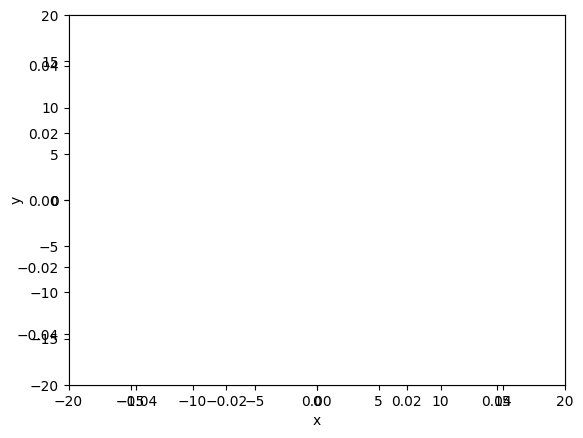

In [6]:
from circle import Circle
from rectangle import Rectangle
import shape2dplotter
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_rectangle(rectangle: Rectangle):
    x = rectangle.x - rectangle.width*.5
    y = rectangle.y - rectangle.height*.5
    return patches.Rectangle([x,y], rectangle.width, rectangle.height)

def plot_circle(circle: Circle):
    return patches.Circle([circle.x,circle.y], circle.radius)

def plot_shapes(**shapes:Shape):
    for shape in shapes:
        if shape == Circle:
            plot_circle(shape)
        if shape == Rectangle:
            plot_rectangle(shape)

fig = plt.plot()
ax = plt.axes()
ax.set(xlim=(-20,20), ylim=(-20,20), xlabel="x", ylabel="y")

circle1 = Circle(0,0,1)
rectangle1 = Rectangle(2,3,4,2)

shapes = Circle(2,6,7),Rectangle(-1,-4,3,4)

print(shapes[0], shapes[1])





## Cartesian coordinates

since we haven't at this point in time gone through how to make a cartesian coordinates grid in matplot i found this when googling and copied the code

AttributeError: module 'shape2dplotter' has no attribute 'plot_rectangle'

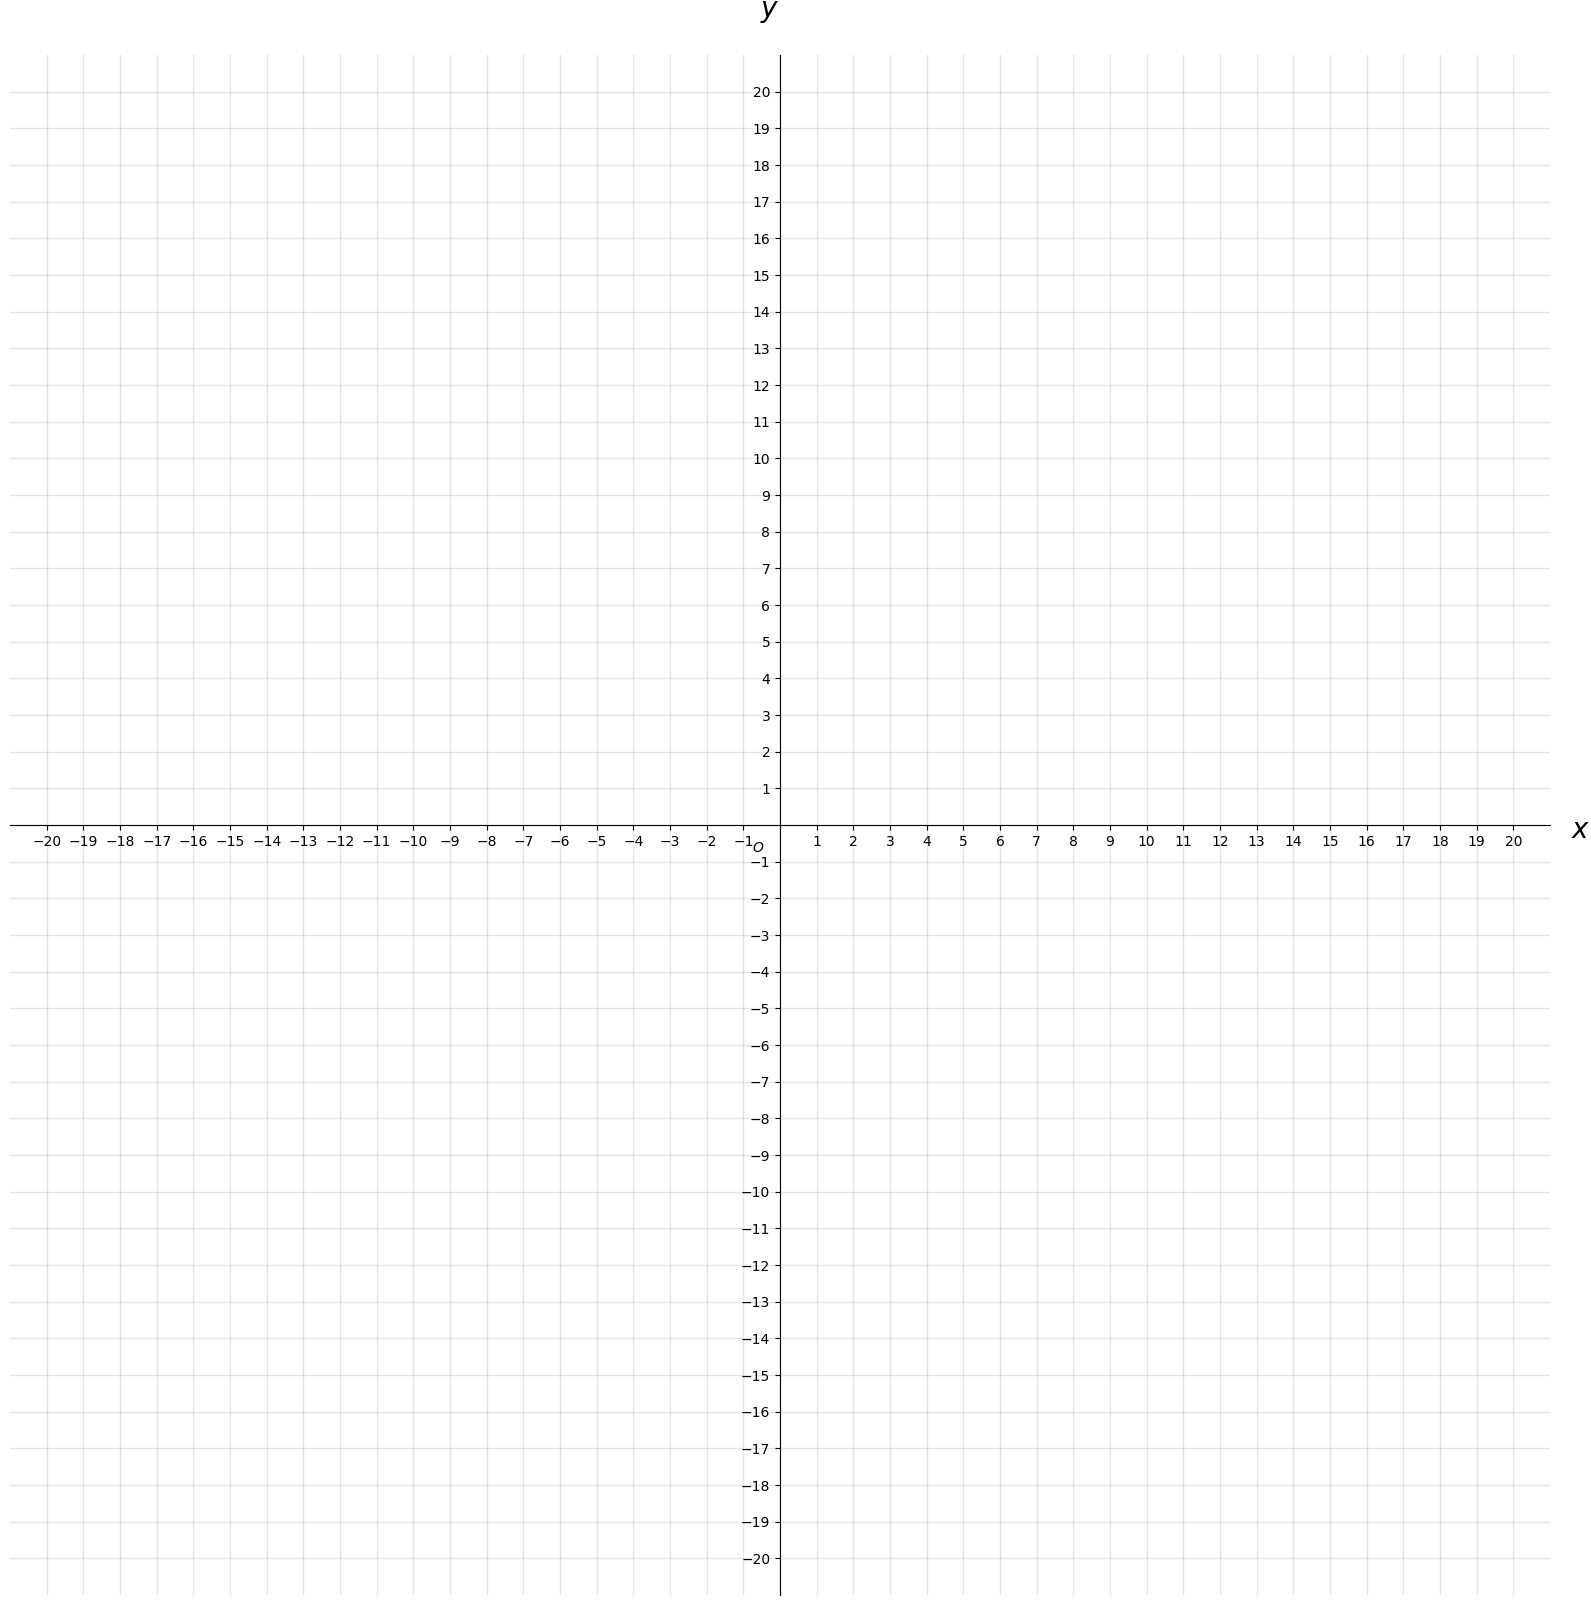

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import shape2dplotter as s2dplt

xmin, xmax, ymin, ymax = -20, 20, -20, 20

fig, ax = plt.subplots(figsize=(20, 20))
fig.patch.set_facecolor('#ffffff')

ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('$x$', size=20, labelpad=-24, x=1.02)
ax.set_ylabel('$y$', size=20, labelpad=-21, y=1.02, rotation=0)
 
plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
    transform=ax.transAxes,
         horizontalalignment='center', fontsize=10)

x_ticks = np.arange(xmin, xmax+1)
y_ticks = np.arange(ymin, ymax+1)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])
ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

circle1 = Circle(0,0,1)
circle2 = Circle(10,15,6)
rectangle1 = Rectangle(2,3,4,2)
rectangle2 = Rectangle(-10,-6, 10,20)


ax.add_patch(s2dplt.plot_rectangle(rectangle1))
ax.add_patch(s2dplt.plot_rectangle(rectangle2))
ax.add_patch(s2dplt.plot_circle(circle1))
ax.add_patch(s2dplt.plot_circle(circle2))



## Shape2dPlotter class

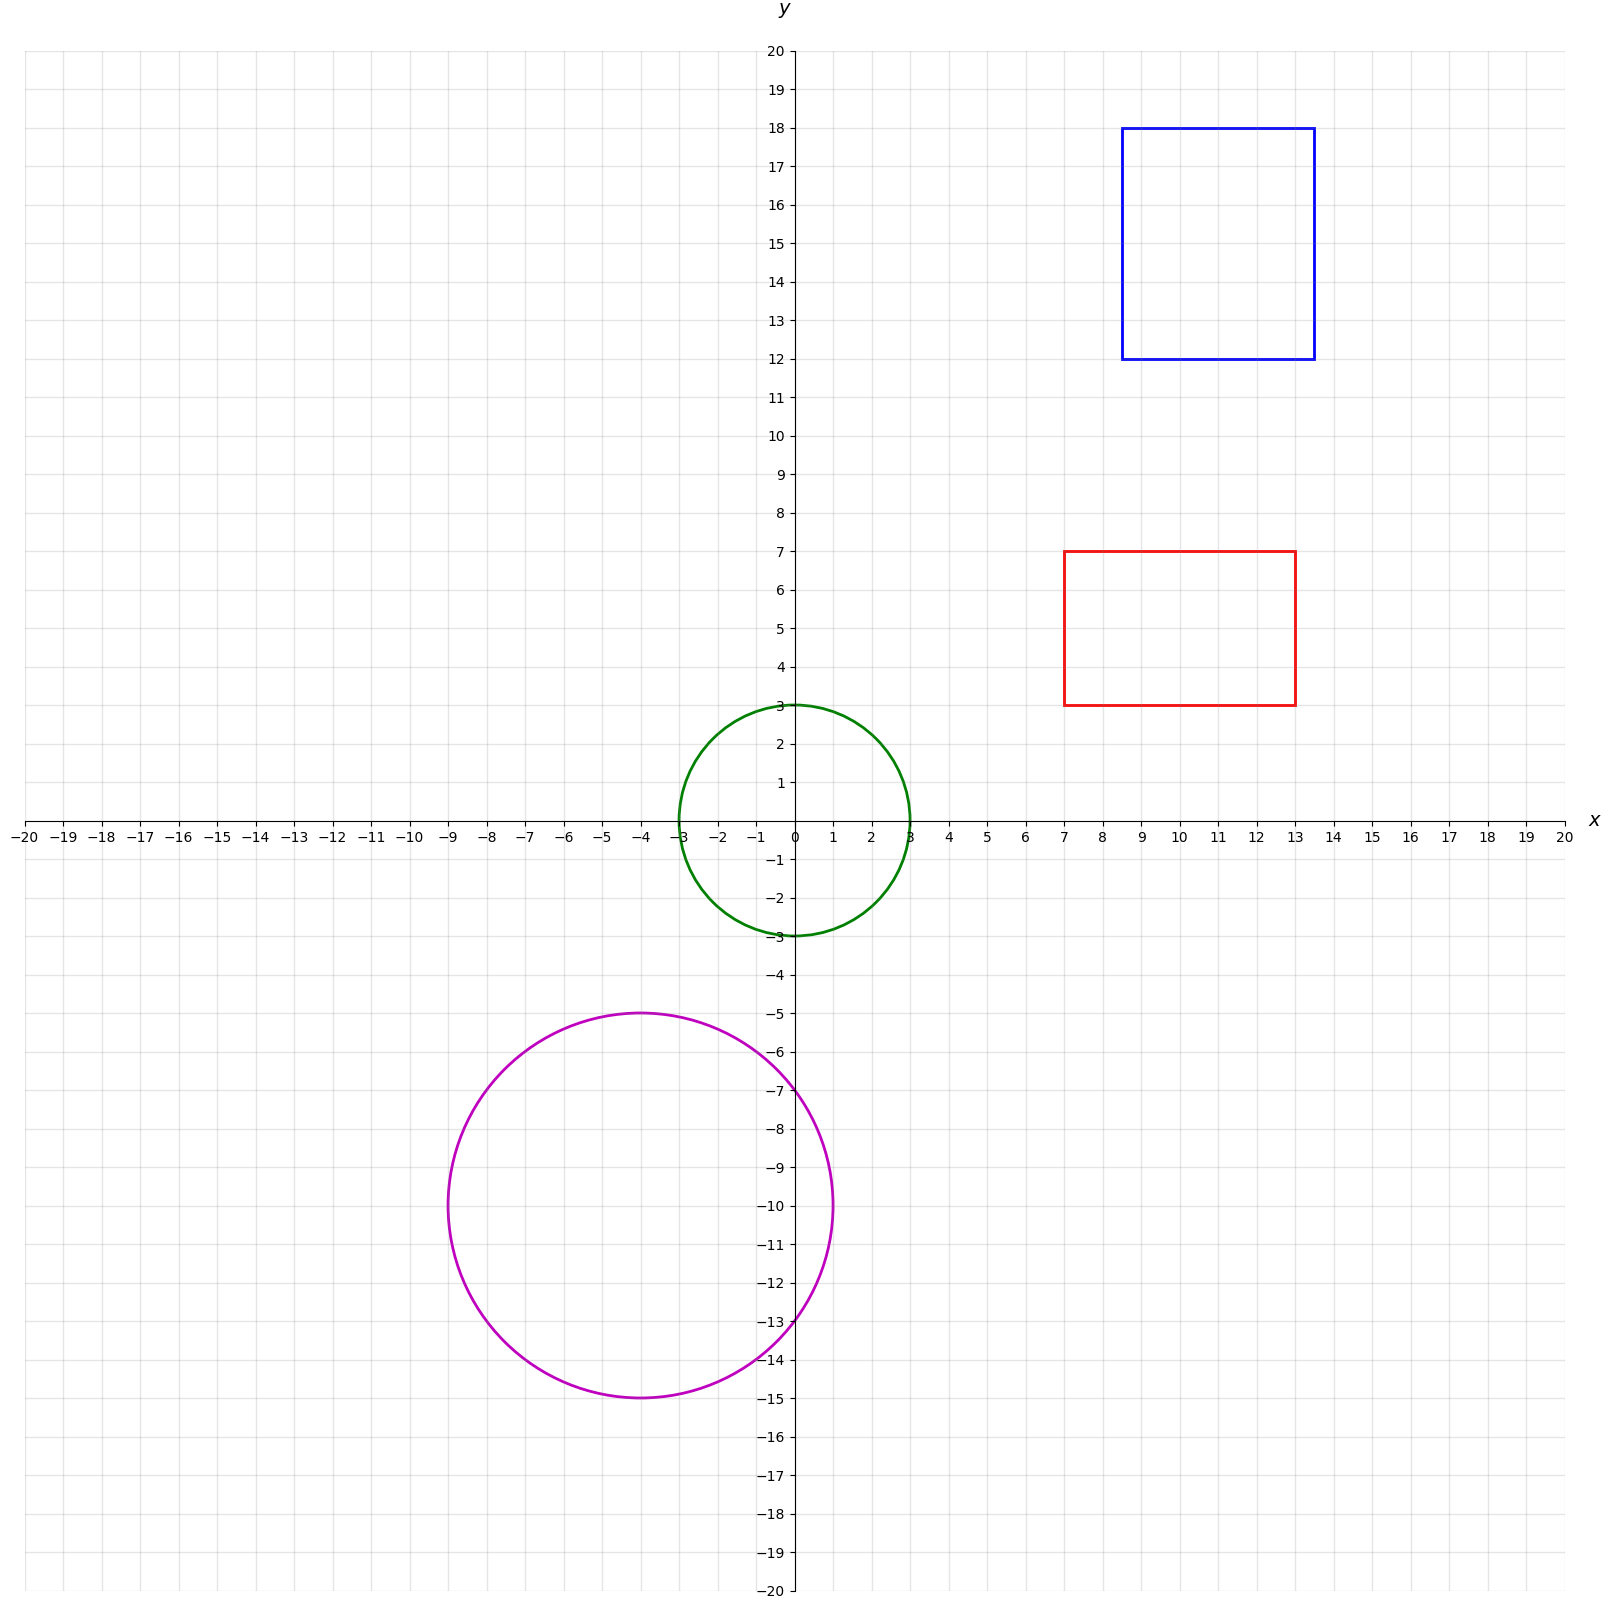

In [1]:
from shape2dplotter import Shape2dPlotter
from rectangle import Rectangle
from circle import Circle

circle1 = Circle(0,0,3)
circle2 = Circle(-4,-10, 5)
rectangle1 = Rectangle(10, 5, 4, 6)
rectangle2 = Rectangle(11,15, 6 ,5)

Shape2dPlotter(rectangle1,rectangle2, circle1, circle2, auto_plot=True)


## Cube

In [ ]:
import utils as utl
from shape import Shape

class Cube(Shape):
    def __init__(self, x, y, sidelength: float):
        super().__init__(x, y)
        self.sidelength = sidelength

    @property
    def sidelength(self):
        return self._sidelength
    
    @sidelength.setter
    def sidelength(self, value):
        utl.validate_positive_numbers(value)
        self._sidelength = value
    
    @property
    def sidearea(self) -> float:
        return self.sidelength**2
    
    @property
    def area(self) -> float:
        """Returns the surface area of a cube"""
        return self.sidearea * 6
    
    @property
    def volume(self) -> float:
        return self.sidelength ** 3
    
    def __repr__(self):
        return f"Cube (x ={self.x},y ={self.y}, sidelength={self.sidelength}, volume={self.volume}, sidearea={self.sidearea}, area={self.area})"

    def __str__(self):
        return f"A cube located at (x = {self.x}, y {self.y}) it has the surface area of {self.area} and the volume of {self.volume}"

    def __eq__(self, other) -> bool:
        return (
            type(self) is type(other)
            and ((other.x - self.x) ** 2 + (other.y - self.y) ** 2) ** 0.5 == 0 #TODO: maybe just use other.x == self.x
            and self.volume == other.volume
        )

    def __lt__(self, other) -> bool:
        return self.volume < other.volume

    def __le__(self, other) -> bool:
        return self.volume <= other.volume

    def __gt__(self, other) -> bool:
        return self.volume > other.volume

    def __ge__(self, other) -> bool:
        return self.volume >= other.volume

#### Manual testing cube

In [10]:
cube1 = Cube(2,3,10)
print(cube1)
cube1

A cube located at (x = 2, y 3) it has the surface area of 600 and the volume of 1000


Cube (x =2,y =3, sidelength=10, volume=1000,sidearea=100, area=600)

## Sphere

In [ ]:
from circle import Circle
import numpy as np

class Sphere(Circle):
    def __init__(self, x, y, radius):
        super().__init__(x, y, radius)

    @property
    def volume(self) -> float:
        return 4/3 * np.pi * self.radius**3
    
    @property
    def area(self) -> float:
        return 4 * np.pi * self.radius**2
    
    def is_unit_sphere(self):
        return self.x == 0 and self.y == 0 and self.radius == 1

In [5]:
sphere1 = Sphere(0,0,1)
sphere2 = Sphere(0,0,2)
sphere1.volume , sphere2.volume, sphere1.area, sphere2.area

(4.1887902047863905, 33.510321638291124, 12.566370614359172, 50.26548245743669)

In [9]:
sphere1.is_unit_circle()


True